# Touching objects labeling
When processing images from fluorescent microscopy, we are often confronted to objects sticking to each other that should be differentiated. However, if we apply connected-component labeling after thresholding, we retrieve one labeled object, where we believe there should be two. ImageJ-users would then use the "Watershed" algorithm that is capable of splitting objects if the shape of an object suggests the object contains of two. Some functions in SimpleITK allow us to do the same. Again, for programming convenience, we use the scriptable napari plugin [napari-simpleitk-image-processing](https://github.com/haesleinhuepf/napari-simpleitk-image-processing).

In [6]:
import numpy as np
from skimage.io import imread
from pyclesperanto_prototype import imshow
from napari_simpleitk_image_processing import threshold_otsu, touching_objects_labeling, gaussian_blur
import pyclesperanto_prototype as cle

Our starting point is a binary image with some 8-shaped objects, we would like to split.

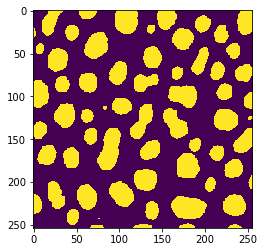

In [7]:
blobs = imread('../../data/blobs.tif')
binary = threshold_otsu(blobs)
imshow(binary)

The `touching_objects_labeling` function takes a binary image as input and produces a label image, just like connected component labeling. The result differs though: The 8-shaped objects are split.

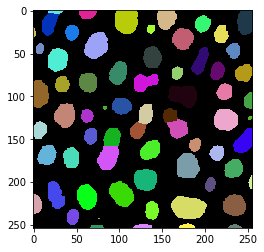

In [8]:
touching_labels = touching_objects_labeling(binary)
cle.imshow(touching_labels, labels=True)

## Fine tuning the result
If not all objects should be split, one can fine-tune the result of this process by modifying the binary image before passing it to `touching_objects_labeling`. For example if we apply a Gaussian blur filter before thesholding the image, we can retrieve a label image where less objects are split.

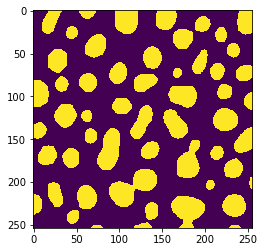

In [17]:
blurred = gaussian_blur(blobs, variance_x=25, variance_y=25)

binary2 = threshold_otsu(blurred)
imshow(binary2)

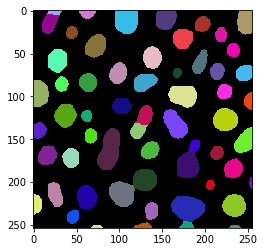

In [18]:
touching_labels = touching_objects_labeling(binary2)
cle.imshow(touching_labels, labels=True)